# Firearm Seizures

In [41]:
import pandas as pd

In [42]:
dataset = pd.read_csv("firearm-seizures.csv", sep=",")

In [43]:
import matplotlib.pyplot as plt

Below is an example of what the dataset looks like:

In [44]:
dataset.sample(10)

,_id,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
3813,4474,"300 BLOCK EAST OHIO ST PITTSBURGH, PA 15212",1,0,1,0,0,0,2021,8,2,NaN,NaN,NaN,4.200356e+10,NaN,1,NaN,40.412532,-79.842796
248,249,"2100 BLOCK PLAINVIEW AVE PITTSBURGH, PA 15226",2,0,1,1,0,0,2015,6,3,Brookline,4.0,19.0,4.200319e+10,5.0,6,4-26,40.401592,-80.020107
3009,3357,"500 BLOCK GUYLYN DR PITTSBURGH, PA 15235",4,0,4,0,0,0,2020,3,5,NaN,NaN,NaN,4.200352e+10,NaN,OSC,NaN,40.466659,-79.804500
1501,1502,"400 BLOCK N AIKEN AVE PITTSBURGH, PA 15206",1,0,1,0,0,0,2017,7,3,Garfield,9.0,11.0,4.200311e+10,2.0,5,3-4,40.467788,-79.934344
10,11,"8600 BLOCK BRICELYN ST PITTSBURGH, PA 15221",1,0,1,0,0,0,2015,1,1,East Hills,9.0,13.0,4.200313e+10,2.0,5,3-17,40.457865,-79.874359
3857,4526,"FRANKSTOWN AVE & N HOMEWOOD AVE PITTSBURGH, PA...",1,0,1,0,0,0,2021,9,0,Homewood South,9.0,13.0,4.200313e+10,2.0,5,3-17,40.457405,-79.896301
1237,1238,"7200 BLOCK FRANKSTOWN AVE PITTSBURGH, PA 15208",1,0,1,0,0,0,2017,2,6,Homewood South,9.0,13.0,4.200313e+10,2.0,5,3-17,40.457389,-79.896270
1868,1869,"200 BLOCK WINSTON ST PITTSBURGH, PA 15207",1,0,1,0,0,0,2018,2,5,Hazelwood,5.0,15.0,4.200356e+10,3.0,4,2-13,40.404761,-79.941466
1234,1235,"CENTRE AVE & FULLERTON ST PITTSBURGH, PA 15219",1,0,1,0,0,0,2017,2,5,Central Business District,6.0,3.0,4.200302e+10,6.0,2,2-4,40.440553,-79.988442
318,319,"1300 BLOCK FIRTH ST PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,7,5,Spring Garden,1.0,24.0,4.200324e+10,1.0,1,1-24,40.461733,-79.988599


To find the best neighborhood using our safety metric, we will evaluate by adding the total number of firearms seized for each Pittsburgh neighborhood by year as well as the total number within the scope of the last 5 years as to keep our evaluation relevant.

The steps to do so are as follows:

In [65]:
# Store the total seizures per neighborhood
alltime_seizures = {}

# Store the total gun seizures per neighborhood from 2017 to 2022
seizures_2017_2022 = {}

# Get neighborhood and total_count columns
for index, row in dataset.iterrows():
    neighborhood = row['neighborhood']
    total_count = row['total_count']
    year = row['year']
    
    # Check if the neighborhood is already in the list
    if neighborhood not in alltime_seizures:
        alltime_seizures[neighborhood] = 0
        seizures_2017_2022[neighborhood] = 0
    
    # Add value of total_count column to sum in alltime_seizures, corresponding to neighborhood
    alltime_seizures[neighborhood] += total_count
    
    # Add the value of total_count only for the years 2017 to 2022
    if 2017 <= year <= 2022:
        seizures_2017_2022[neighborhood] += total_count
        

# Print the top 10 neighborhoods with the least overall seizures
print("Top 10 neighborhoods with the least overall seizures:")
for neighborhood, total_seizures in sorted(alltime_seizures.items(), key=lambda x: x[1])[:10]:
    print(f'{neighborhood}: {total_seizures} seizures')

# Print the top 10 neighborhoods with the least seizures from 2017 to 2022
print("\nTop 10 neighborhoods with the least seizures (2017-2022):")
for neighborhood, seizures in sorted(seizures_2017_2022.items(), key=lambda x: x[1])[:10]:
    print(f'{neighborhood}: {seizures} seizures')

# Print the top 10 neighborhoods with the most seizures from 2017 to 2022
print("\nTop 10 neighborhoods with the most seizures (2017-2022):")
for neighborhood, seizures in sorted(seizures_2017_2022.items(), key=lambda x: x[1], reverse=True)[:11]:
    print(f'{neighborhood}: {seizures} seizures')

Top 10 neighborhoods with the least overall seizures:
Summer Hill: 3 seizures
Swisshelm Park: 3 seizures
Chartiers City: 4 seizures
Regent Square: 4 seizures
Oakwood: 4 seizures
Mt. Oliver: 4 seizures
Friendship: 5 seizures
West End: 6 seizures
St. Clair: 7 seizures
Hays: 8 seizures

Top 10 neighborhoods with the least seizures (2017-2022):
Summer Hill: 1 seizures
Chartiers City: 3 seizures
West Oakland: 3 seizures
Regent Square: 3 seizures
Oakwood: 3 seizures
Swisshelm Park: 3 seizures
Arlington Heights: 4 seizures
Friendship: 4 seizures
Mt. Oliver: 4 seizures
Banksville: 5 seizures

Top 10 neighborhoods with the most seizures (2017-2022):
nan: 794 seizures
Homewood South: 254 seizures
South Side Flats: 175 seizures
Brighton Heights: 120 seizures
East Liberty: 119 seizures
Carrick: 114 seizures
Marshall-Shadeland: 113 seizures
Hazelwood: 113 seizures
East Hills: 111 seizures
Homewood North: 103 seizures
Perry South: 103 seizures


__The top three neighborhoods with the *least* firearms seized (alltime) are:__
1. __Summer Hill__ / Swisshelm Park:  3 seizures
2. Chartiers City/ Regent Square/ Oakwood/ Mt. Oliver:  4 seizures
3. Friendship: 5 seizures

__The top three neighborhoods with the *least* firearms seized from 2017-2022 (the last 5 years) are:__
1. __Summer Hill__: 1 seizure
2. Chartiers City/ West Oakland/ Regent Square/ Oakwood/ Swisshelm Park:  3 seizures
3. Arlington Heights/ Friendship/ Mt. Oliver:  4 seizures

__The top three neighborhoods with the *most* firearms seized from 2017-2022 (the last 5 years) are:__
1. Homewood South:  794 seizures
2. South Side Flats:  175 seizures
3. Brighton Heights:  120 seizures

### Visualization of the different types of firearms seized:

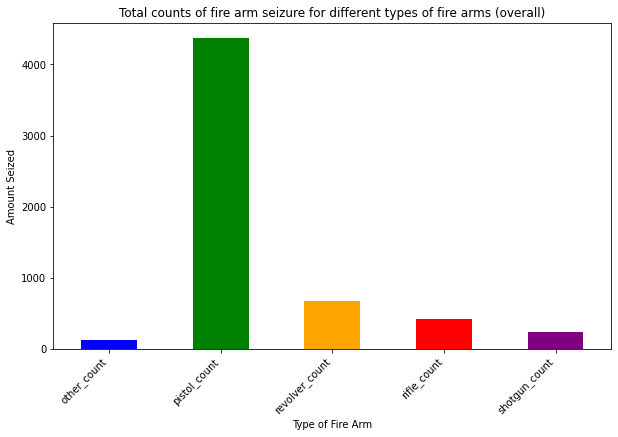

In [62]:
count_columns = ['other_count', 'pistol_count', 'revolver_count', 'rifle_count', 'shotgun_count']

# Calculate total count for each category
category_totals = dataset[count_columns].sum()

# Plot
plt.figure(figsize=(10, 6))
category_totals.plot(kind='bar', color=['blue', 'green', 'orange', 'red', 'purple', 'brown'])
plt.title('Total counts of fire arm seizure for different types of fire arms (overall)')
plt.xlabel('Type of Fire Arm')
plt.ylabel('Amount Seized')
plt.xticks(rotation=45, ha='right')
plt.show()


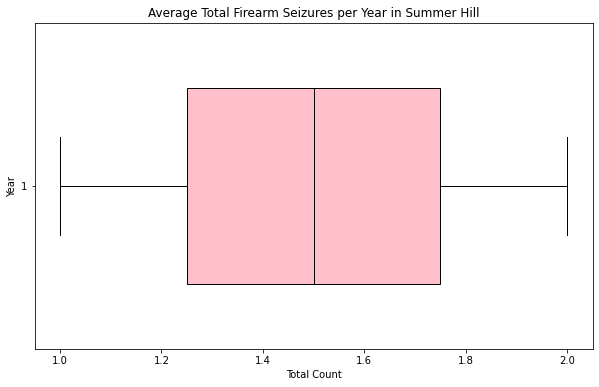

Mean Total Count for Summer Hill: 1.5 firearm seizures per year.


In [66]:
neighborhood_name = 'Summer Hill'

# Filter dataset for Summer Hill neighborhood
summer_hill_data = dataset[dataset['neighborhood'] == neighborhood_name]

# Group data by year and calculate average total_count for each year
average_total_count_per_year = summer_hill_data.groupby('year')['total_count'].mean().reset_index()

# Create box plot
plt.figure(figsize=(10, 6))
plt.boxplot(average_total_count_per_year['total_count'],
            widths=0.6, patch_artist=True, vert=False,
            boxprops=dict(facecolor='pink', color='black'),
            medianprops=dict(color='black'))

#labels
plt.title(f'Average Total Firearm Seizures per Year in {neighborhood_name}')
plt.xlabel('Total Count')
plt.ylabel('Year')
plt.show()

#mean amount of firearms seized per year in Summer Hill
mean_total_count = summer_hill_data['total_count'].mean()
print(f'Mean Total Count for {neighborhood_name}: {mean_total_count} firearm seizures per year.')